In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,Y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

In [5]:
X

array([[-0.41817983, -1.31549931],
       [-2.18303002,  0.40250992],
       [ 0.70238165,  2.39942367],
       ...,
       [ 0.42163723,  0.76303302],
       [ 1.00109696,  0.89461257],
       [-0.14602534, -2.2961689 ]], shape=(1000, 2))

In [6]:
Y

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,

<Axes: xlabel='0', ylabel='1'>

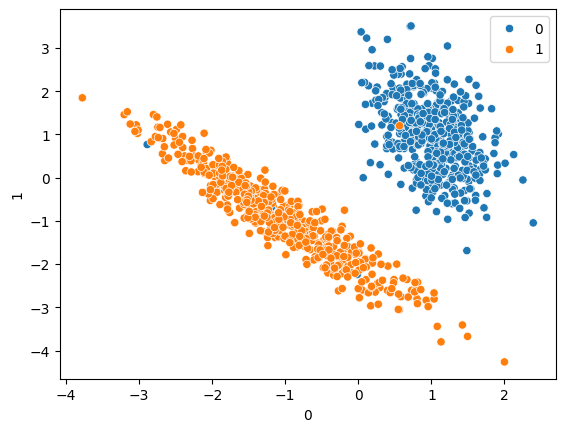

In [11]:
sns.scatterplot(
    x=pd.DataFrame(X)[0],
    y=pd.DataFrame(X)[1],
    hue=Y
)


In [12]:
from sklearn.svm import SVC

In [13]:
svc=SVC(kernel="linear")

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [15]:
svc.fit(X_train,Y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [16]:
y_pred=svc.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score=accuracy_score(Y_test,y_pred)
c=confusion_matrix(Y_test,y_pred)
cr=classification_report(Y_test,y_pred)

In [21]:
print(accuracy_score,c,cr)

0.992 [[123   2]
 [  0 125]]               precision    recall  f1-score   support

           0       1.00      0.98      0.99       125
           1       0.98      1.00      0.99       125

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



# regression

In [38]:
df=sns.load_dataset('tips')

In [39]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [41]:
X=df[["tip","sex","smoker","day","time","size"]]
Y=df['total_bill']

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=10)

In [44]:
from sklearn.preprocessing import LabelEncoder
lable1=LabelEncoder()
lable2=LabelEncoder()
lable3=LabelEncoder()

In [46]:
X_train['sex']=lable1.fit_transform(X_train["sex"])
X_train['smoker']=lable2.fit_transform(X_train["smoker"])
X_train['time']=lable3.fit_transform(X_train["time"])

In [47]:
X_test['sex']=lable1.transform(X_test["sex"])
X_test['smoker']=lable2.transform(X_test["smoker"])
X_test['time']=lable3.transform(X_test["time"])

In [48]:
X_train.head()

,tip,sex,smoker,day,time,size
58,1.76,1,1,Sat,0,2
1,1.66,1,0,Sun,0,3
2,3.50,1,0,Sun,0,3
68,2.01,1,0,Sat,0,2
184,3.00,1,1,Sun,0,2


In [49]:
X_test.head()

,tip,sex,smoker,day,time,size
162,2.00,0,0,Sun,0,3
60,3.21,1,1,Sat,0,2
61,2.00,1,1,Sat,0,2
63,3.76,1,1,Sat,0,4
69,2.09,1,1,Sat,0,2


In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[("onehot",OneHotEncoder(drop="first"),[3])],remainder="passthrough")

In [58]:
X_train=ct.fit_transform(X_train)

In [59]:
X_test=ct.transform(X_test)

In [60]:
from sklearn.svm import SVR
svr=SVR()

In [61]:
svr.fit(X_train,Y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [62]:
y_pred=svr.predict(X_test)

In [63]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)


In [64]:
print(mse,mae,r2)

45.692136151683385 4.1486423210190235 0.46028114561159283
